# Global Terrorism Dataset Analysis

# Loading the CSV file

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
df = pd.read_csv('globalterrorismdb.csv', low_memory=False)

# The 10 most effective terrorist groups . 

Top 10 most effective terrorist groups are displayed in the above bar graph. We are first making a list of terroist groups in ascending order of their no. of attacks and then displaying top 11 rows (The first row shows the unknown group hence we are taking 11 rows.)

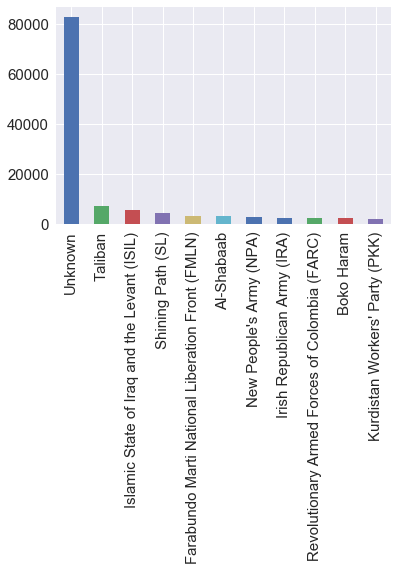

In [36]:
df1=df['gname'].value_counts().head(11)
df1.plot.bar()

# First five country with Highests Terrorist Attacks

Top five countries with most terrorist attacks is also displayed by a bar graph using the same procedure as above.

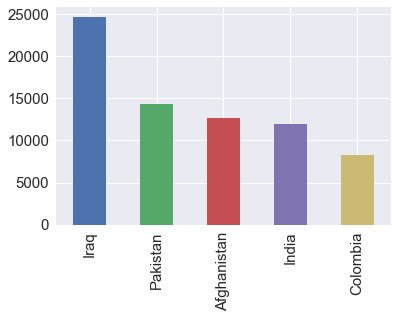

In [37]:
df2=df['country_txt'].value_counts().head()
df2.plot.bar()

# Number Of Terrorist Activities By Region Per Year

To display no. of terrorist activities by region per year we are first creating a table using crosstab function of pandas and then displaying the result by a line graph.

In [43]:
terror_region=pd.crosstab(df.iyear,df.region_txt)
(terror_region)

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


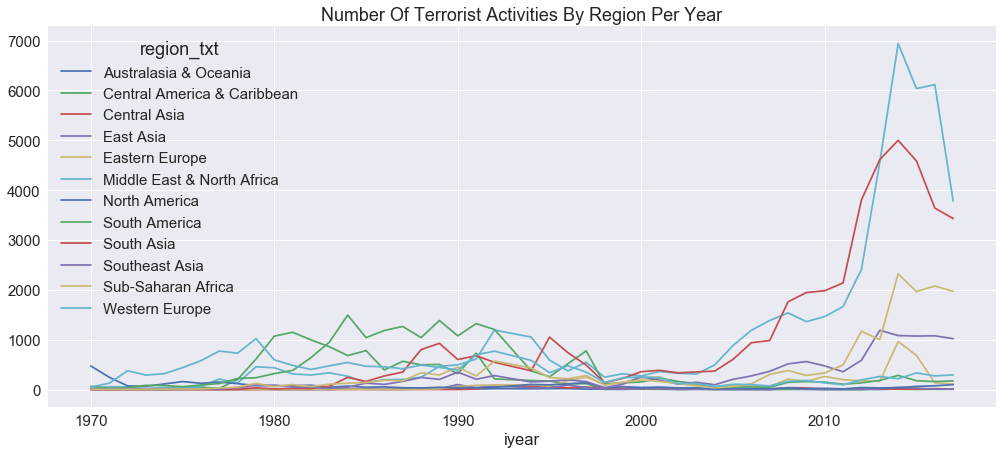

In [41]:
terror_region.plot()
fig=plt.gcf()
fig.set_size_inches(17,7)
plt.title('Number Of Terrorist Activities By Region Per Year')
plt.show()

# Comparison between no. of persons killed and wounded

The above graph shows the comparison between the no. of people killed and the no. of people wounded by different types of attacks( mainly attacks by bombing and attacks by facility or infrastructure.)

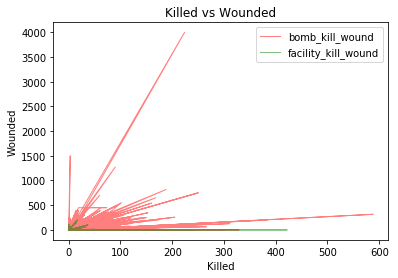

In [26]:
attck_bomb=df[df.attacktype1_txt=='Bombing/Explosion']
attck_facility=df[df.attacktype1_txt=='Facility/Infrastructure Attack']
plt.plot(attck_bomb.nkill,attck_bomb.nwound,color='r',linewidth=1,alpha=0.5,label='bomb_kill_wound')
plt.plot(attck_facility.nkill,attck_facility.nwound,color='g',linewidth=1,alpha=0.5,label='facility_kill_wound')
plt.xlabel("Killed")
plt.ylabel("Wounded")
plt.legend()
plt.title("Killed vs Wounded")
plt.show()

# Frequency of attacks per year

The information about the frequency of attacks per year is displayed by the above histogram.

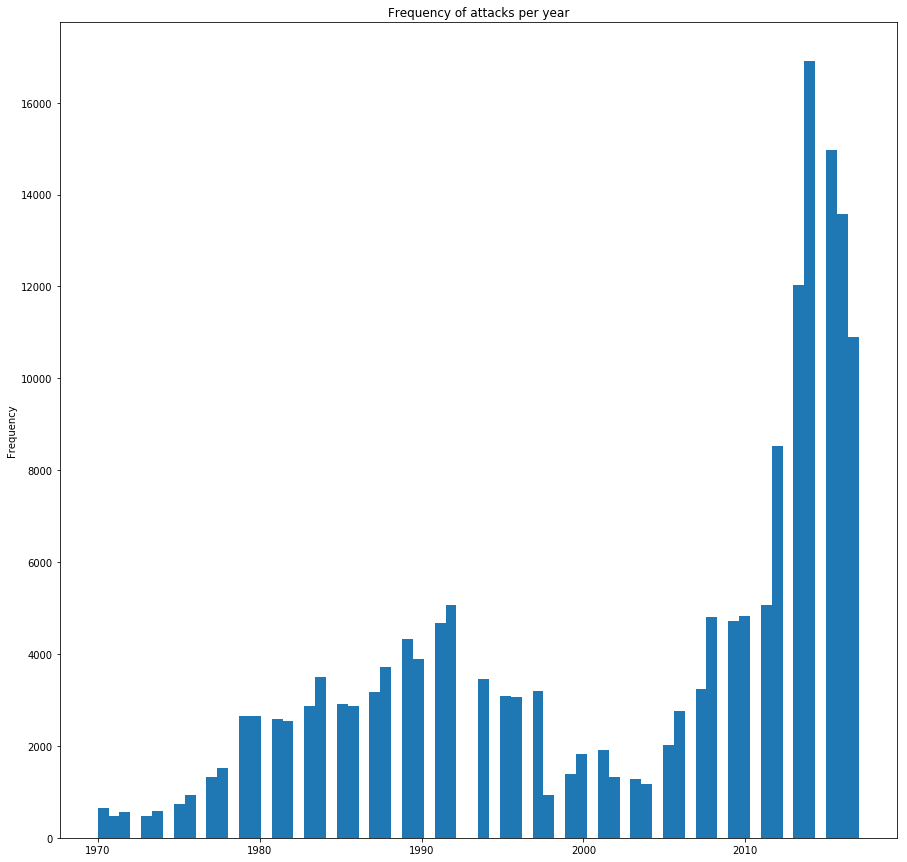

In [28]:
df.iyear.plot(kind='hist',bins=70,figsize=(15,15))
plt.title("Frequency of attacks per year")
plt.show()

# Different Types of Attacks

The percentage comparison between different types of attacks is displayed by the above pie chart.

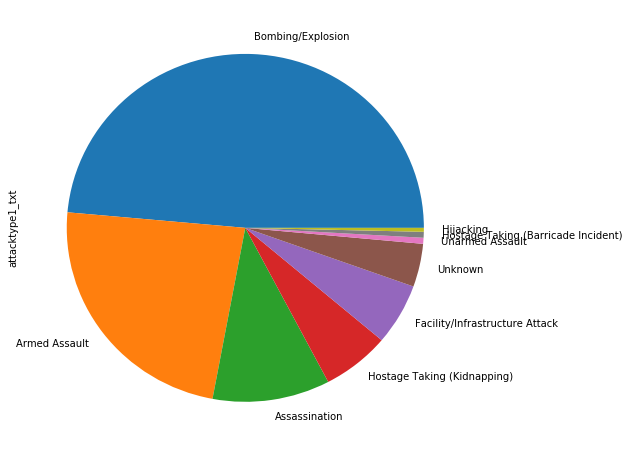

In [32]:
df3=df['attacktype1_txt'].value_counts(dropna=False)
df3.plot.pie(figsize = (8,8))

# Subgraphs for killed and wounded people

Two subgraphs one for the no. of persons killed and one for the no. of persons wounded in all the attacks are displayed.

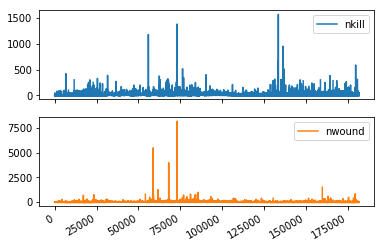

In [6]:
df4 = df.loc[:,["nkill","nwound"]]
df4.plot(subplots=True)
plt.show()

# No. of persons killed per year

The above scatter graph shows the no. of persons killed per year in all the terrorist attacks.

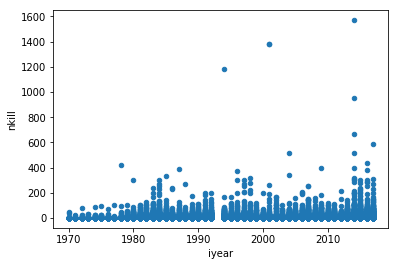

In [40]:
df.plot(kind='scatter',x='iyear',y='nkill')


# Plot of attack type vs. region

This graph shows the no. of different types of attacks in each region. Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

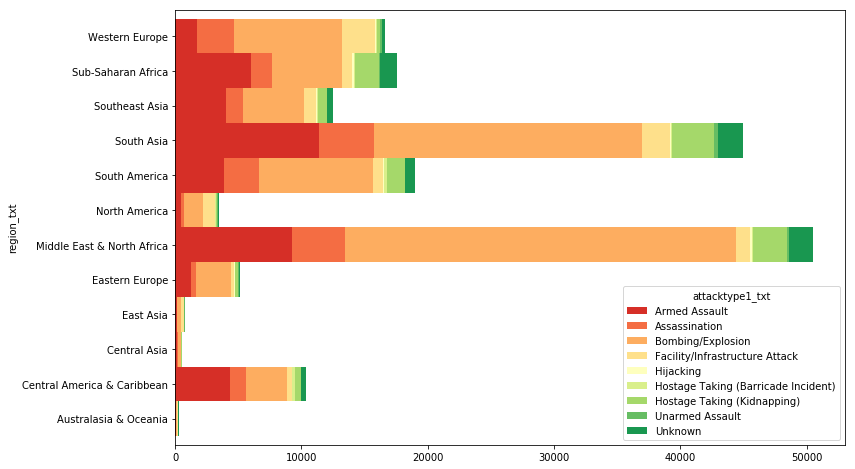

In [6]:
pd.crosstab(df.region_txt,df.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# Heatmap

The heatmap shows the comparison between every atribute in the dataset.

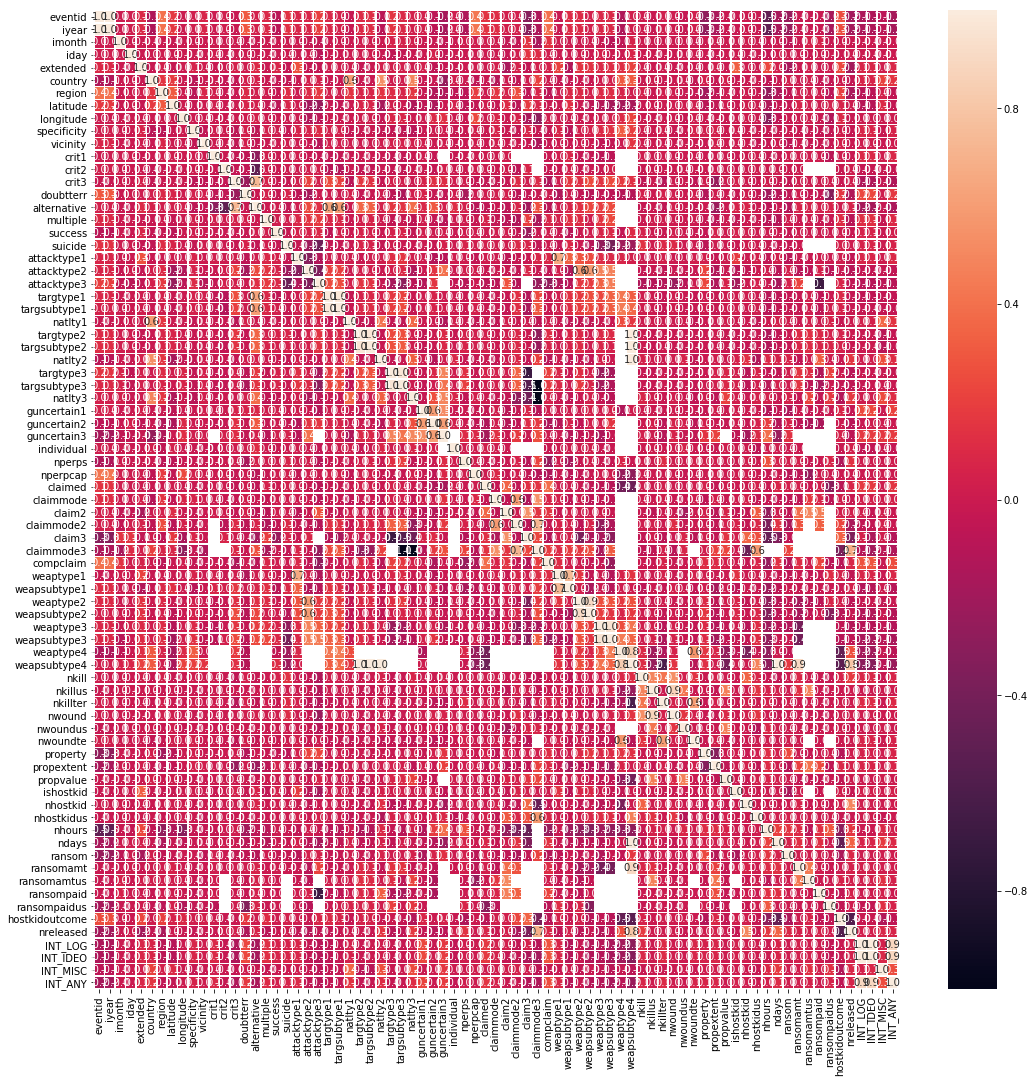

In [8]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Terrorist Attacks all over the world

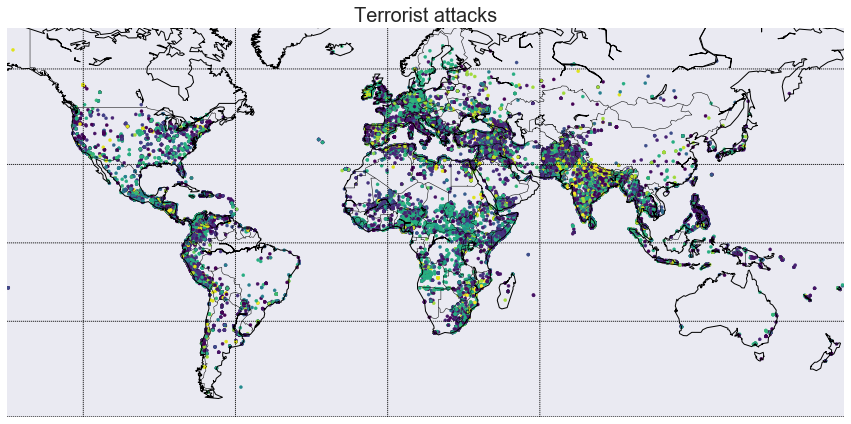

In [34]:
def mapWorld(col1,size2,label4,metr=100,colmap='hot',ds=df,scat=False):
    datatt = ds
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-150,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-120,91.,30.))
    m.drawmeridians(np.arange(-120,90.,60.))
    lat = datatt['latitude'].values
    lon = datatt['longitude'].values
    a_1 = datatt[col1].values
    if size2:
        a_2 = datatt[size2].values
    else: a_2 = 1
    if scat:
        m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,edgecolors='black',cmap=colmap,alpha=1)
    else:
        m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,cmap=colmap,alpha=1)
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
plt.title('Terrorist attacks', fontsize=20)
mapWorld(col1='targtype1', size2=False,label4='',metr=10,colmap='viridis',ds=df)

# Successful and Unsuccessful Terrorist Attacks around the world

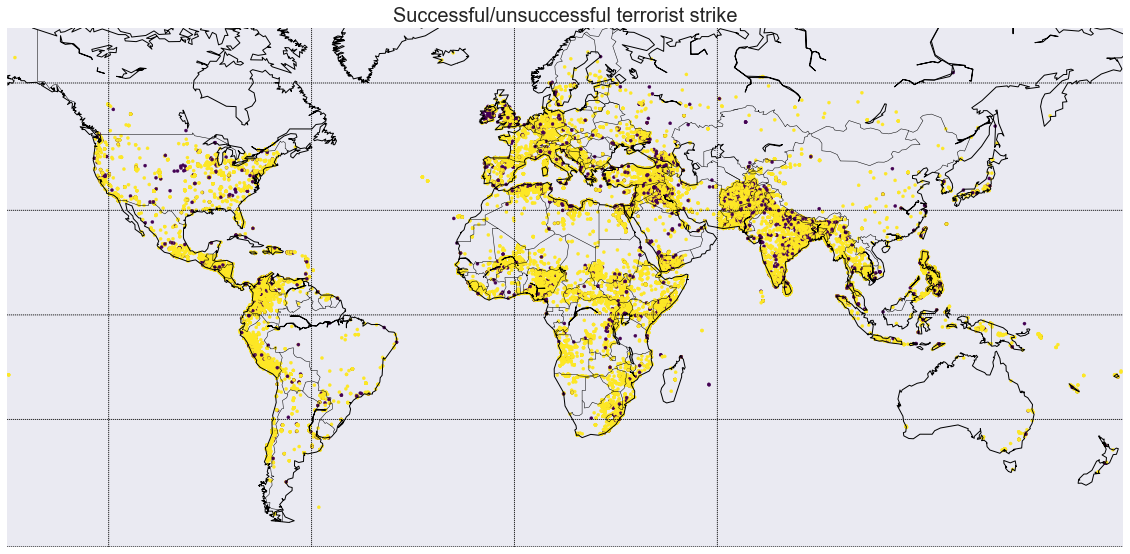

In [33]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
plt.title('Successful/unsuccessful terrorist strike', fontsize=20)
mapWorld(col1='success', size2=False,label4='',metr=10,colmap='viridis',ds=df)